In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-model/new.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [3]:
df=pd.read_csv('../input/new-model/new.csv')
df.head(3)

,Gender,Age,Relationships,Children,Employment,Rate your consumption of digital services,would you like to change the amount of screen time you are currently spending,Overall how do you work condition influence your mental wellbeing,consideration of concerns,I personaly hesitate to voice my concerns,...,online presence and digital device usage,Self esteem,Time management,Career Growth,Strees levels,Never thoughts,physicall health and conditions,Interest skills,Personal relationships,Mental health wellbeing
0,Male,20-23 years old,Single,No,"Student with a job (e.g. part time, full time,...",6,Yes,4.0,7,I do not personally hesitate to voice my concerns,...,Online presence and digital device usage,I do not have self-esteem,Time management,I do not see career growth,I do not have strees levels,Negative thoughts,Physical health and condition,I do not have interest and skills,Personal relationships,Mental health and wellbeing
1,Female,35-40 years old,Single,"Yes, I have kid(s).",Unknown,6,No,8.0,8,I do not personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,I do not have self-esteem,I do have time management,Career growth,I do not have strees levels,Positive thoughts,I do not have physical health and condition,I do not have interest and skills,Personal relationships,Mental health and wellbeing
2,Male,20-23 years old,Single,No,"Student with a job (e.g. part time, full time,...",7,I have not decided,4.0,3,I personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,Self-esteem,I do have time management,I do not see career growth,Stress levels,Positive thoughts,I do not have physical health and condition,Interests and skills,Personal relationships,I do not have Mental health and wellbeing


In [4]:
# the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 38 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Gender                                                                         6525 non-null   object 
 1   Age                                                                            6525 non-null   object 
 2   Relationships                                                                  6525 non-null   object 
 3   Children                                                                       6525 non-null   object 
 4   Employment                                                                     6525 non-null   object 
 5   Rate your consumption of digital services                                      6525 non-null   int64  
 6   would you like to change

In [5]:
# the number of rows and columns 
df.shape

(6525, 38)

In [6]:
# We want to divide the data into categorical and numerical
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')

In [7]:
for cat in cat_cols.columns:
    print(f"{cat}")
    print(cat_cols[cat].unique())
    print(cat)

Gender
['Male' 'Female' 'Nonbinary / Otherwise gender-diverse']
Gender
Age
['20-23 years old' '35-40 years old' '24-27  years old' '28-30 years old'
 '31- 35 years old' 'Unknwon']
Age
Relationships
['Single' 'In a relationship' 'Married or domestic partnership' 'Divorced'
 'Separated' 'Widowed' 'Unknown']
Relationships
Children
['No' 'Yes, I have kid(s).' 'Yes, I have recently become a parent.']
Children
Employment
['Student with a job (e.g. part time, full time, internship)' 'Unknown'
 'Full-time employed for less than or equal to 5 years'
 'Full-time employed for more than 5 and less than 10 years' 'Student'
 'Full-time employed for more than or equal to 10 years' 'Unknwon']
Employment
would you like to change the amount of screen time you are currently spending
['Yes' 'No' 'I have not decided' 'Does not matter']
would you like to change the amount of screen time you are currently spending
I personaly hesitate to voice my concerns
['I do not personally hesitate to voice my concerns'


In [8]:
# Describe the categorical
cat_cols.describe()

,Gender,Age,Relationships,Children,Employment,would you like to change the amount of screen time you are currently spending,I personaly hesitate to voice my concerns,my company does not cultivate this kind of culture,I do not feel comfortable with my supervisors,Highest priority in your life currently,...,online presence and digital device usage,Self esteem,Time management,Career Growth,Strees levels,Never thoughts,physicall health and conditions,Interest skills,Personal relationships,Mental health wellbeing
count,6525,6525,6525,6525,6525,6525,6525,6525,6525,6525,...,6525,6525,6525,6525,6525,6525,6525,6525,6525,6525
unique,3,6,7,3,7,4,2,2,2,7,...,2,2,2,2,2,3,2,2,2,2
top,Male,28-30 years old,Married or domestic partnership,"Yes, I have kid(s).",Full-time employed for less than or equal to 5...,Yes,I do not personally hesitate to voice my concerns,My company cultivates this kind of culture,I feel comfortable with my supervisors,Mental and physical wellbeing,...,I do not use Online presence and digital devic...,I do not have self-esteem,I do have time management,I do not see career growth,I do not have strees levels,Negative thoughts,I do not have physical health and condition,I do not have interest and skills,I do not have Personal relationships,I do not have Mental health and wellbeing
freq,3757,2114,2805,2777,2930,3353,5684,5161,5928,1881,...,5738,5563,4807,4312,3935,4065,4379,4990,5139,5775


# Result:
*  As you see, the msot people are Married, have kid(kids), the age between 28 to 30 and most of them are Men

In [9]:
# Clean the Age with years old
df.columns=df.columns.str.replace('','')
df.Age=df.Age.str.replace('years old','')

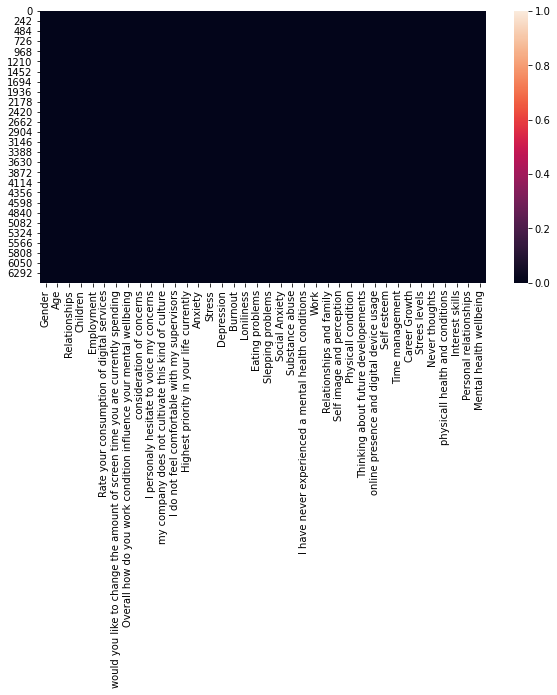

In [10]:
# As you see, there is no missing values 
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull());

In [11]:
# As you see, the age between 28 to 30 has the highest percentage.
df['Age'].value_counts(normalize=True)*100

28-30      32.398467
24-27      27.969349
31- 35     20.337165
20-23      13.961686
35-40       4.582375
Unknwon     0.750958
Name: Age, dtype: float64

In [12]:
# most people are married 
df['Relationships'].value_counts(normalize=True)*100

Married or domestic partnership    42.988506
In a relationship                  20.429119
Single                             19.065134
Divorced                           11.601533
Separated                           4.567050
Widowed                             1.333333
Unknown                             0.015326
Name: Relationships, dtype: float64

In [13]:
# almost 45% of people have work experience less or equal to 5 years
df['Employment'].value_counts(normalize=True)*100

Full-time employed for less than or equal to 5 years          44.904215
Full-time employed for more than 5 and less than 10 years     24.720307
Student with a job (e.g. part time, full time, internship)    17.578544
Student                                                        6.651341
Full-time employed for more than or equal to 10 years          5.931034
Unknwon                                                        0.199234
Unknown                                                        0.015326
Name: Employment, dtype: float64

In [14]:
# most people do not have physicall and health conditions
df['physicall health and conditions'].value_counts(normalize=True)*100

I do not have physical health and condition    67.111111
Physical health and condition                  32.888889
Name: physicall health and conditions, dtype: float64

In [15]:
# most people have experienced a mental health conditions
df['I have never experienced a mental health conditions'].value_counts()

I have experienced a mental health condition          6005
I have never experienced a mental health condition     520
Name: I have never experienced a mental health conditions, dtype: int64

In [16]:
# As you see, the people who have mental health, their age are between 24 to 27
df['Age'].unique()
Age_Mental_health_wellbeing=pd.crosstab(df['Age'],df['Mental health wellbeing'])
Age_Mental_health_wellbeing

Mental health wellbeing,I do not have Mental health and wellbeing,Mental health and wellbeing
Age,,
20-23,791,120
24-27,1620,205
28-30,1919,195
31- 35,1158,169
35-40,245,54
Unknwon,42,7


In [17]:
df['Anxiety'].unique()
Gender_Anxiety=pd.crosstab(df['Gender'],df['Anxiety'])
Gender_Anxiety

Anxiety,Anxiety,Do not have Anxiety
Gender,,
Female,700,1542
Male,996,2761
Nonbinary / Otherwise gender-diverse,28,498


In [18]:
df['Highest priority in your life currently'].unique()
Highest_priority_in_your_life_currently_Overall_how_do_you_work_condition_influence_your_mental_wellbeing=pd.crosstab(df['Highest priority in your life currently'],df['Overall how do you work condition influence your mental wellbeing'])
Highest_priority_in_your_life_currently_Overall_how_do_you_work_condition_influence_your_mental_wellbeing

Overall how do you work condition influence your mental wellbeing,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Highest priority in your life currently,,,,,,,,,,,
Balance between different aspects of my life,6,12,42,62,75,164,133,138,156,76,31
I do not know,0,1,1,1,0,4,3,2,2,1,1
Mental and physical wellbeing,6,37,65,88,148,317,316,359,329,144,66
My family and kids,2,9,36,28,32,50,59,92,146,56,20
Self-actualization,4,33,91,122,150,210,273,262,222,117,34
Social life and relationships,5,21,24,44,78,141,163,180,133,87,31
Work related success,2,22,12,33,32,98,150,182,140,63,44


In [19]:
# As you see, Most male do not comfortable with their supervisors
df['I do not feel comfortable with my supervisors'].unique()
I_do_not_feel_comfortable_with_my_supervisors_Gender=pd.crosstab(df['I do not feel comfortable with my supervisors'],df['Gender'])
I_do_not_feel_comfortable_with_my_supervisors_Gender

Gender,Female,Male,Nonbinary / Otherwise gender-diverse
I do not feel comfortable with my supervisors,,,
I feel comfortable with my supervisors,2056,3477,395
I do not feel comfortable with my supervisors,186,280,131


In [20]:
# We want to use some filters with some attributes 
df[(df['Anxiety']=='Anxiety')& (df['Time management']=='Time management')& (df['Overall how do you work condition influence your mental wellbeing']>6) & (df['Thinking about future developements']=='Thinking about future developments')]

,Gender,Age,Relationships,Children,Employment,Rate your consumption of digital services,would you like to change the amount of screen time you are currently spending,Overall how do you work condition influence your mental wellbeing,consideration of concerns,I personaly hesitate to voice my concerns,...,online presence and digital device usage,Self esteem,Time management,Career Growth,Strees levels,Never thoughts,physicall health and conditions,Interest skills,Personal relationships,Mental health wellbeing
24,Male,20-23,Single,No,"Student with a job (e.g. part time, full time,...",6,Yes,7.0,7,I do not personally hesitate to voice my concerns,...,Online presence and digital device usage,Self-esteem,Time management,Career growth,Stress levels,Negative thoughts,Physical health and condition,Interests and skills,Personal relationships,Mental health and wellbeing
58,Male,28-30,Married or domestic partnership,"Yes, I have kid(s).",Full-time employed for less than or equal to 5...,6,Yes,7.0,7,I do not personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,I do not have self-esteem,Time management,I do not see career growth,I do not have strees levels,Negative thoughts,Physical health and condition,I do not have interest and skills,I do not have Personal relationships,I do not have Mental health and wellbeing
215,Female,24-27,Single,No,Full-time employed for less than or equal to 5...,7,No,9.0,8,I do not personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,I do not have self-esteem,Time management,Career growth,Stress levels,Positive thoughts,I do not have physical health and condition,Interests and skills,I do not have Personal relationships,I do not have Mental health and wellbeing
223,Male,20-23,Single,No,"Student with a job (e.g. part time, full time,...",10,I have not decided,8.0,9,I do not personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,Self-esteem,Time management,I do not see career growth,Stress levels,Positive thoughts,I do not have physical health and condition,Interests and skills,I do not have Personal relationships,Mental health and wellbeing
266,Female,24-27,Married or domestic partnership,No,Full-time employed for less than or equal to 5...,7,No,8.0,7,I do not personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,I do not have self-esteem,Time management,I do not see career growth,I do not have strees levels,Positive thoughts,Physical health and condition,Interests and skills,I do not have Personal relationships,I do not have Mental health and wellbeing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,Female,24-27,In a relationship,No,Full-time employed for less than or equal to 5...,8,Yes,8.0,7,I do not personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,I do not have self-esteem,Time management,I do not see career growth,I do not have strees levels,Negative thoughts,Physical health and condition,Interests and skills,I do not have Personal relationships,I do not have Mental health and wellbeing
6468,Male,20-23,Single,No,"Student with a job (e.g. part time, full time,...",7,Yes,7.0,8,I do not personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,Self-esteem,Time management,I do not see career growth,Stress levels,Negative thoughts,Physical health and condition,I do not have interest and skills,I do not have Personal relationships,Mental health and wellbeing
6473,Male,24-27,In a relationship,No,Full-time employed for less than or equal to 5...,7,I have not decided,8.0,8,I do not personally hesitate to voice my concerns,...,I do not use Online presence and digital devic...,I do not have self-esteem,Time management,I do not see career growth,I do not have strees levels,Negative thoughts,Physical health and condition,Interests and s

In [21]:
df_groped_sum=df.groupby('Relationships', as_index=False)['Overall how do you work condition influence your mental wellbeing'].agg('sum').rename(columns={'Overall how do you work condition influence your mental wellbeing':'Overall_how_do_you_work_condition_influence_your_mental_wellbeing_Sum'})
df_grouped_cnt=df.groupby('Relationships',as_index=False)['Overall how do you work condition influence your mental wellbeing'].agg('count').rename(columns={'Overall how do you work condition influence your mental wellbeing':'Overall_how_do_you_work_condition_influence_your_mental_wellbeing_Count'})

# Merge these lines
df_grouped_average=df_groped_sum.merge(df_grouped_cnt, left_on='Relationships',right_on='Relationships',how='inner')

# We want to calculate the average
df_grouped_average.loc[:,'Average range of mental wellbeing']=df_grouped_average['Overall_how_do_you_work_condition_influence_your_mental_wellbeing_Sum']/df_grouped_average['Overall_how_do_you_work_condition_influence_your_mental_wellbeing_Count']

# the final result
df_grouped_average.sort_values('Overall_how_do_you_work_condition_influence_your_mental_wellbeing_Sum',ascending=False)


,Relationships,Overall_how_do_you_work_condition_influence_your_mental_wellbeing_Sum,Overall_how_do_you_work_condition_influence_your_mental_wellbeing_Count,Average range of mental wellbeing
2,Married or domestic partnership,17650.0,2800,6.303571
1,In a relationship,8263.0,1333,6.198800
4,Single,8174.0,1244,6.570740
0,Divorced,3919.0,756,5.183862
3,Separated,1620.0,298,5.436242
6,Widowed,437.0,87,5.022989
5,Unknown,5.0,1,5.000000


* As you see,the average range of mental wellbeing for the married and domestic partnership is almost 7( it is high number ) and has the highest portion (2803) people

In [22]:
df_grouped_sum=df.groupby('Gender',as_index=False)['Rate your consumption of digital services'].agg('sum').rename(columns={'Rate your consumption of digital services':'Rate_your_consumption_of_digital_services_Sum'})
df_grouped_cnt=df.groupby('Gender',as_index=False)['Rate your consumption of digital services'].agg('count').rename(columns={'Rate your consumption of digital services':'Rate_your_consumption_of_digital_services_Count'})

# Merge the 2 lines
df_grouped_average=df_grouped_sum.merge(df_grouped_cnt,left_on='Gender',right_on='Gender',how='inner')

# Calculate the average

df_grouped_average.loc[:,'average consumption of digital service']=df_grouped_average['Rate_your_consumption_of_digital_services_Sum']/df_grouped_average['Rate_your_consumption_of_digital_services_Count']

# the final result
df_grouped_average.sort_values('Rate_your_consumption_of_digital_services_Sum',ascending=False)

,Gender,Rate_your_consumption_of_digital_services_Sum,Rate_your_consumption_of_digital_services_Count,average consumption of digital service
1,Male,23174,3757,6.168219
0,Female,14438,2242,6.439786
2,Nonbinary / Otherwise gender-diverse,2280,526,4.334601


 On the top, we use groupby to divide the gender and find the sum, count and average rate the comsumption of degital services and for male and female is almost same(Female is more than Male a     little) for average consumption of degital ( high amount ) although the number of male people are more than female





* Before begining with the EDA which should learn about the organization which has collected this data.Millennial mental wellbeing a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.



* MMW came out with a new survey to see how employees want to get mental health treatment in tech companies around the world. This survey is filled by respondents who suffer from mental health disorders (diagnose or un-diagnosed by medical, even it's just a feeling) in tech companies and see if any factors can affect the employee to get treatment or not.From this research, this machine learning can help HR to see what factors have the company needs to support so the employee wants to get mental health treatment. Let us begin by understanding the target data!



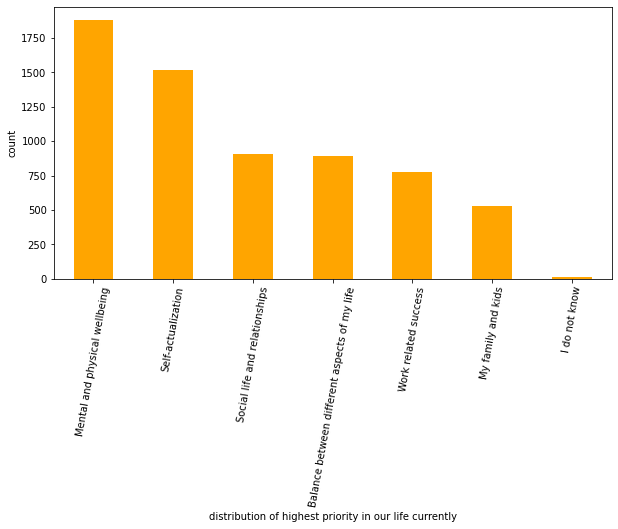

In [23]:
plt.rcParams['figure.figsize']=(10,5)
df['Highest priority in your life currently'].value_counts().sort_values(ascending=False).plot.bar(color='orange')
plt.xlabel('distribution of highest priority in our life currently')
plt.ylabel('count')
plt.xticks(rotation=80)
plt.show()
# the highets part is for Mental and physicall and mental wellbeing and small part do not know what kind they have 

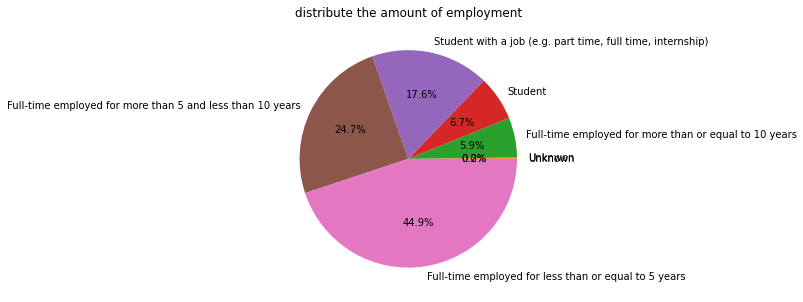

In [24]:
plt.rcParams['figure.figsize']=(10,5)
df['Employment'].value_counts().sort_values(ascending=True).plot.pie(y='Employment',autopct="%0.1f%%")
plt.title('distribute the amount of employment')
plt.axis('off')
plt.show()
# Full time job less than 5 years has the highest portion and 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


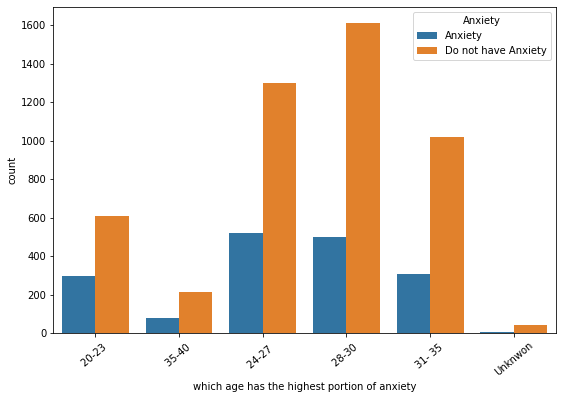

In [25]:
fig,ax=plt.subplots(figsize=(9,6))
sns.countplot(df['Age'],hue=df['Anxiety'],ax=ax)
plt.xlabel('which age has the highest portion of anxiety')
plt.ylabel('count')
plt.xticks(rotation=40)
plt.show()
# the age between 24 to 27 has the highest percent of anxiety among another ages

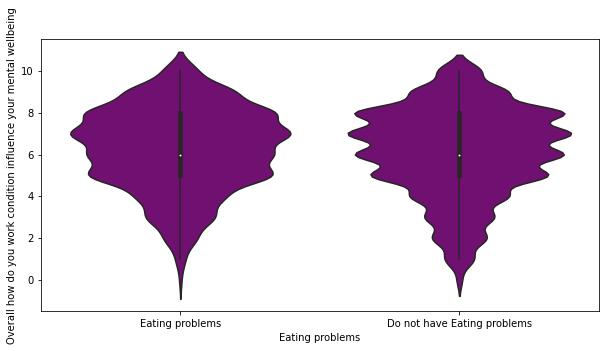

In [26]:
sns.violinplot(x='Eating problems',y='Overall how do you work condition influence your mental wellbeing',data=df, color='purple')
plt.show()
# As you see, most people do not have eating problems and also the range of the mental wellbeing influences is between 4 to 7 , it means very positively

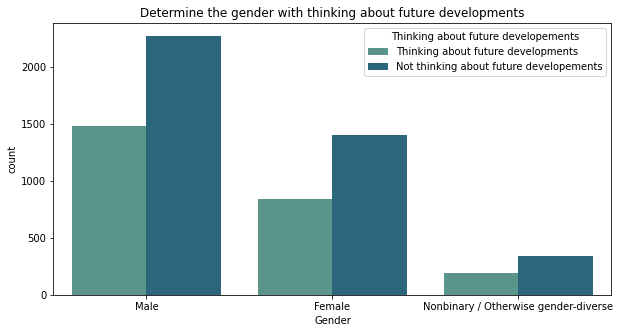

<Figure size 720x360 with 0 Axes>

In [27]:
sns.countplot(data=df, x='Gender',hue='Thinking about future developements',palette='crest')
plt.title('Determine the gender with thinking about future developments')
plt.figure(figsize=(10,5))
plt.show()

This is the respondents result of question, 'Have you sought Gender for a mental health condition?'.

This is our target variable. Looking at the first graph, we see that the percentage of peopel who are not Hesitate to voice the concerns by gender is almost 13%. Workplaces that promote mental health and support people with mental disorders are more likely to have increased productivity, reduce absenteeism, and benefit from associated economic gains.

Be more productive you need to face of your concerns and be free and relax during the hard situations and make people around them happy. After analysing the target variable, we will try to explore the individual columns and what they mean.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


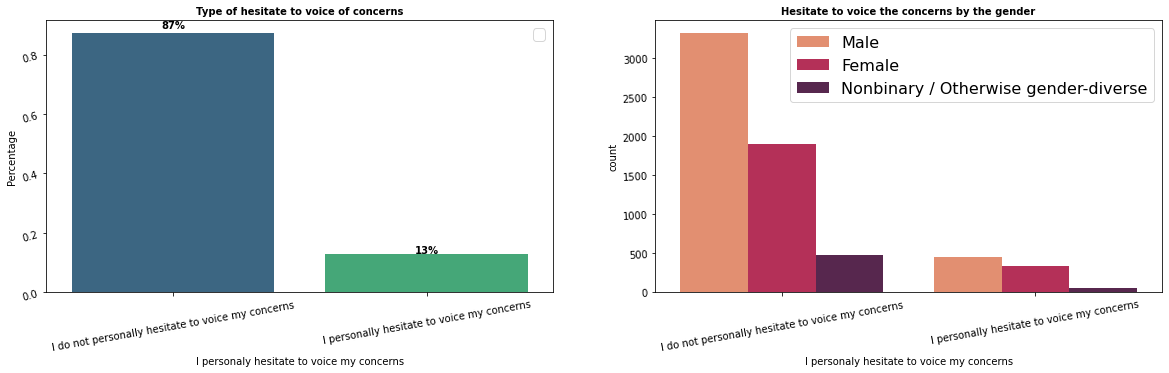

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
percentage=df['I personaly hesitate to voice my concerns'].value_counts(normalize=True).rename_axis('I personaly hesitate to voice my concerns').reset_index(name='Percentage')
ax=sns.barplot(x='I personaly hesitate to voice my concerns',y='Percentage',data=percentage, palette = 'viridis')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('Type of hesitate to voice of concerns',fontsize=10,fontweight='bold')
plt.xticks(rotation=10)
plt.yticks(rotation=16)
plt.legend(fontsize=16)


plt.subplot(1,2,2)
sns.countplot(df['I personaly hesitate to voice my concerns'],hue=df['Gender'],palette='rocket_r')
plt.title('Hesitate to voice the concerns by the gender',fontsize=10,fontweight='bold')
plt.xticks(rotation=10)
plt.yticks(rotation=3)
plt.legend(fontsize=16)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


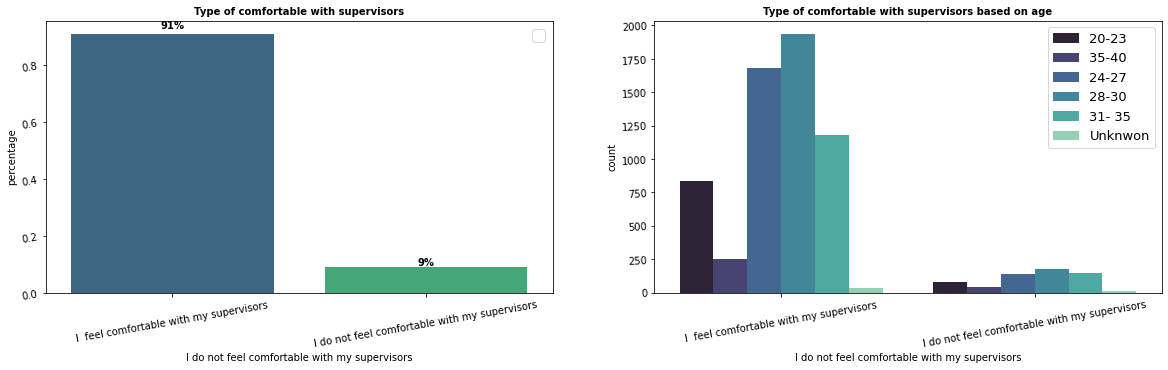

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
percentage=df['I do not feel comfortable with my supervisors'].value_counts(normalize=True).rename_axis('I do not feel comfortable with my supervisors').reset_index(name='percentage')
ax=sns.barplot(x='I do not feel comfortable with my supervisors',y='percentage',data=percentage, palette = 'viridis')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.title('Type of comfortable with supervisors',fontsize=10, fontweight='bold')
plt.xticks(rotation=10)
plt.yticks(rotation=10)
plt.legend(fontsize=16)

    
plt.subplot(1,2,2)
sns.countplot(df['I do not feel comfortable with my supervisors'],hue=df['Age'],palette='mako')
plt.title('Type of comfortable with supervisors based on age',fontsize=10,fontweight='bold')
plt.xticks(rotation=10)
plt.yticks(rotation=3)
plt.legend(fontsize=13)
    
plt.show()

This is the respondents answer to the question, 'Are you comfortable with your supervisors?'.

From close to 90% of the survey shows that they are comfortable, the plot shows that the age age between 28 to 30 has the most portion.comfortable with supervisors is a significant risk factor for many mental health disorders.

Thus, this is an important factor that has to be taken under consideration as it influences the behaviour of the people to a significant extent.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


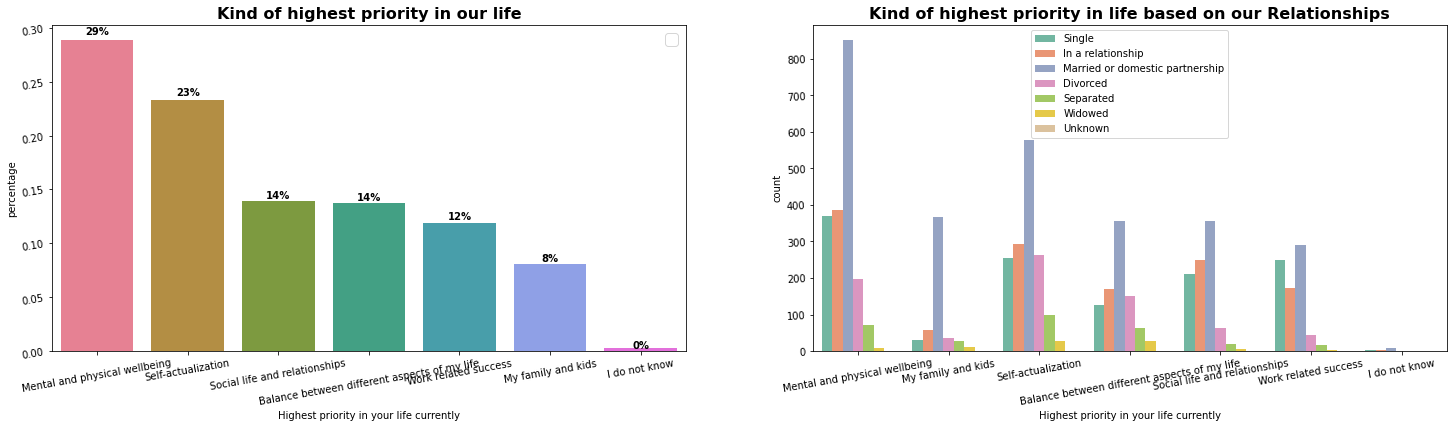

In [30]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
percentage=df['Highest priority in your life currently'].value_counts(normalize=True).rename_axis('Highest priority in your life currently').reset_index(name='percentage')
ax=sns.barplot(x='Highest priority in your life currently',y='percentage',data=percentage,palette='husl')

for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
    
plt.title('Kind of highest priority in our life',fontsize=16, fontweight='bold')    
plt.xticks(rotation=10)
plt.yticks(rotation=10)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['Highest priority in your life currently'],hue=df['Relationships'],palette='Set2')
plt.title('Kind of highest priority in life based on our Relationships',fontsize=16,fontweight='bold')
plt.xticks(rotation=10)
plt.yticks(rotation=3)
plt.legend(fontsize=10)

plt.show()

This was the respondent's answer to the question, 'Highest priority in our life currently?'.

We see that around 30% of the respondents said that Mental and physicall wellbeing has the highest priority, whereas a significant number ( 8% ) of them think that my family and kids are not their priority. Coming to the second graph, we want to see the highest priority based on the relatioship which divided into 7 groups. Surprisingly, the people who are married or domestic partnership has the highest part and in all groups, married people have the highest portion.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


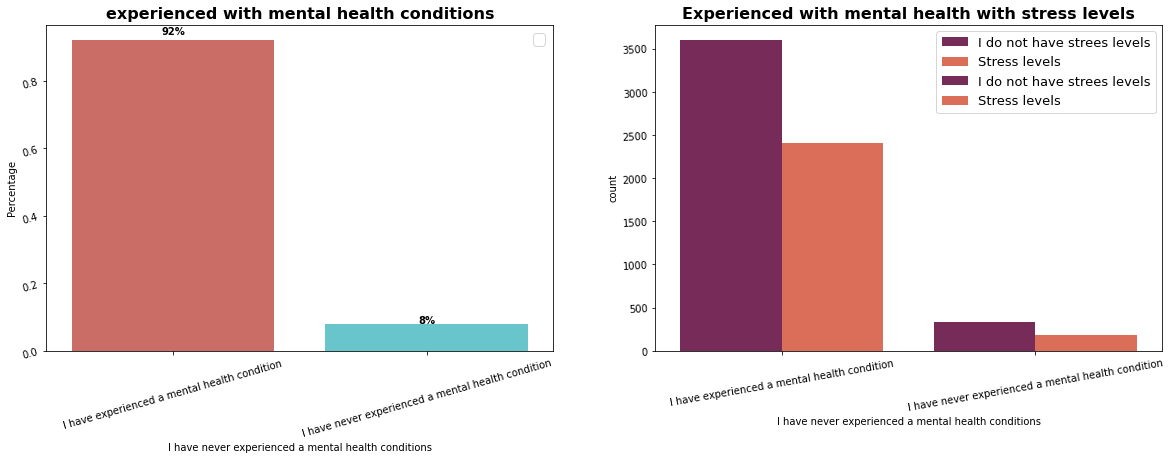

In [31]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
percentage=df['I have never experienced a mental health conditions'].value_counts(normalize=True).rename_axis('I have never experienced a mental health conditions').reset_index(name='Percentage')
ax=sns.barplot(x='I have never experienced a mental health conditions',y='Percentage',data=percentage,palette='hls')


for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
    plt.title('experienced with mental health conditions',fontsize=16, fontweight='bold')
    plt.xticks(rotation=16)
    plt.yticks(rotation=16)
    plt.legend(fontsize=16)
    
    plt.subplot(1,2,2)
    sns.countplot(df['I have never experienced a mental health conditions'], hue=df['Strees levels'],palette='rocket')
    plt.title('Experienced with mental health with stress levels',fontsize=16, fontweight='bold')
    
    plt.xticks(rotation=10)
    plt.yticks(rotation=3)
    plt.legend(fontsize=13)
    
plt.show()

This is the respondent's answer to the question, 'Have you ever experienced mental health conditions?'

While close to 92% of the people answered that they had before,and just 8 % they did not have.

In the second graph,the most people who have experienced before do not have stress levels.

On the other hand, the people who have not experinced before,they had just 10% stress levels.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


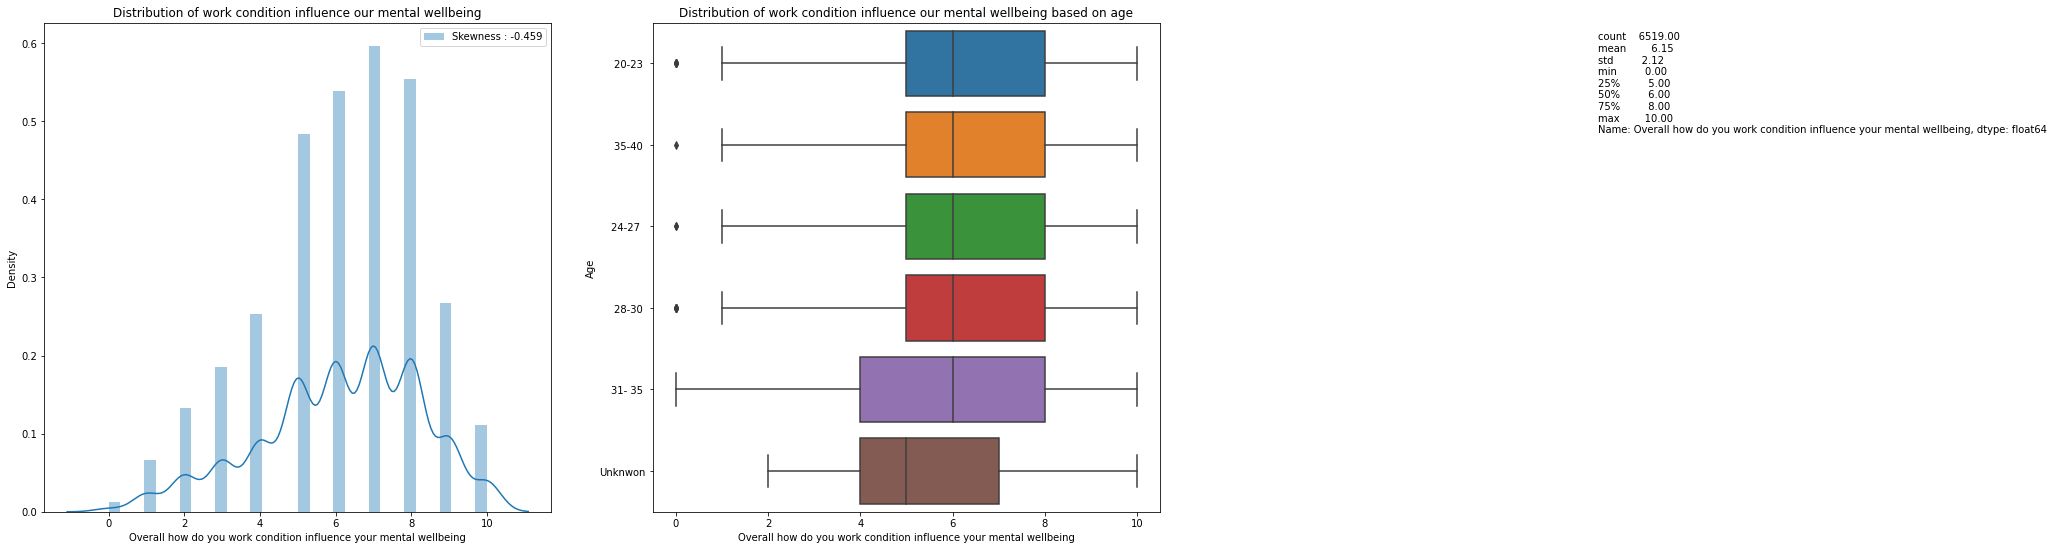

In [32]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
sns.distplot(df['Overall how do you work condition influence your mental wellbeing'],label = 'Skewness : %.3f'%(df['Overall how do you work condition influence your mental wellbeing'].skew()))
plt.legend(fontsize=10)

plt.title('Distribution of work condition influence our mental wellbeing',fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(x='Overall how do you work condition influence your mental wellbeing',y='Age',data=df)

plt.legend(fontsize=3,loc='upper left', frameon=False)
plt.title('Distribution of work condition influence our mental wellbeing based on age',fontsize=12)
Overall_how_do_you_work_condition_influence_your_mental_wellbeing= str(df['Overall how do you work condition influence your mental wellbeing'].describe().round(2))
plt.text(20, 0.85,Overall_how_do_you_work_condition_influence_your_mental_wellbeing)
plt.show()

This was the respondent's answer to the question, 'Overall how do you work condition influence your mental wellbeing'.

We see that number 7 is highest amount for influence in our mental wellbeing(Very positively), whereas a number 0 has a lowest amount(Very negatively).

Coming to the second graph, we want to see the work condition influence your mental wellbeing with age which divided into 7 groups.

Surprisingly, the age between 31 to 35 has the amount between 4 to 8 ( Very positively).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


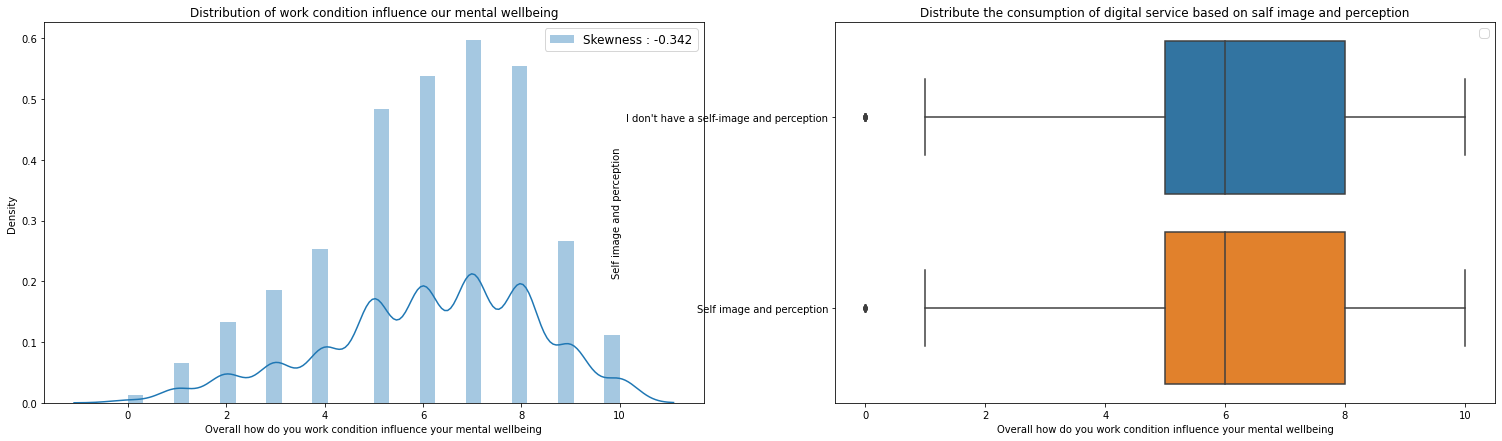

In [33]:
plt.figure(figsize=(26,7))
plt.subplot(1,2,1)
sns.distplot(df['Overall how do you work condition influence your mental wellbeing'],label = 'Skewness : %.3f'%(df['Rate your consumption of digital services'].skew()))
plt.legend(fontsize=12)
plt.title('Distribution of work condition influence our mental wellbeing',fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x='Overall how do you work condition influence your mental wellbeing',y='Self image and perception',data=df)
plt.legend(fontsize=12)
plt.title('Distribute the consumption of digital service based on salf image and perception',fontsize=12)
plt.show()

This was the respondent's answer to the question, 'Overall how do you work condition inflence your mental wellbeing?'.

We see that number 7 is highest amount for influence in our mental wellbeing(Very positively), whereas a number 0 has a lowest amount(Very negatively).

Coming to the second graph, we want to see the work condition influence your mental wellbeing with self image and perception which dovided into 2 groups.

Surprisingly, the amount of not have self image and perception is between 5 and 8 and people who have self image and perception is between 5 to 8.